# Setting Up a Simple Experiment

This is a complete example of how one would test a human subject on a small set of TSPs, and compare human tours to optimal (Concorde) tours. Adapted from the [documentation for the `experiment` module](https://jackv.co/tsp/tsp/experiment.html).

In [19]:
import matplotlib.pyplot as plt
import numpy as np

from tsp.core.tsp import TSP
from tsp.experiment.batch import save_problem_batch
from tsp.experiment.batch_server import batch_server_run
from tsp.experiment.batch_solver import solve_batch, score_batch_2
from tsp.core.solvers import ConcordeSolver

First, generate a set of problems (in this case, we will create a set of 10 20-city problems).

In [8]:
problems = []
for i in range(10):
    problems.append(TSP.generate_random(20))

Then, save the problem set in `test/problems`.

In [9]:
save_problem_batch(problems, 'test/problems')

Now, run the UI to collect solutions from the human (the UI can be accessed at [localhost:8080](http://localhost:8080/)). Save them in `test/human`.

In [10]:
batch_server_run('test/problems', 'test/human', randomized=False)

Serving on http://localhost:8080 ...
Stopping server...


Generate Concorde solutions to the problem set, saving them in `test/concorde`.

In [13]:
concorde_solutions = solve_batch('test/problems', ConcordeSolver, 'test/concorde')

Finally, you can generate the errors when comparing the human tours to the optimal tours produced by Concorde. `errors` will store an array of the errors for the 10 problems, `mean` the mean of the 10 errors, and `ste` the standard error of the mean.

In [15]:
errors, mean, ste = score_batch_2('test/problems', 'test/human', 'test/concorde')

Here's a simple visualization in which the problems are rank-ordered by human error, and displayed with problem number on the abscissa and error on the ordinate.

Human Error: 0.026 +/- 0.010


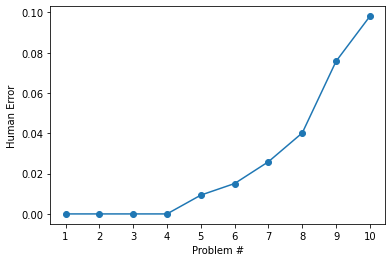

In [26]:
print(f'Human Error: {mean:.3f} +/- {ste:.3f}')
plt.plot(np.arange(1, 11), sorted(errors), 'o-')
plt.xticks(np.arange(1, 11))
plt.xlabel('Problem #')
plt.ylabel('Human Error')
plt.show()